# Example Notebook

This is an example notebook.

Modify / remove any of the below as suited for your needs

## Setup

In [1]:
# package install 
# !pip3 install flake8
# !pip3 install m2r
# !pip3 install nbformat
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install pytest
# !pip3 install pytest-cookies
# !pip3 install pytest-cov
# !pip3 install sphinx
# !pip3 install spacy
# !pip3 install nltk
# !pip3 install wordcloud


# Standard python packages
import os
import sys
import string
# # for natural language processing: named entity recognition
# import spacy
# from spacy.displacy.render import EntityRenderer
# from IPython.core.display import display, HTML

# Other package imports
import numpy as np
import pandas as pd



# if uising a Jupyter notebook, include:

# Visualization packages
from wordcloud import WordCloud
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.style.use("ggplot")

Setup some global settings and configuration

In [2]:
project_root = os.path.abspath(os.path.join(os.pardir, os.pardir))
data_folder = os.path.join(project_root, 'data')
data_folder_raw = os.path.join(data_folder, 'raw')
src_folder = os.path.join(project_root, 'src')
print(project_root)
print(data_folder)
print(data_folder_raw)
print(src_folder)

/notebooks
/notebooks/data
/notebooks/data/raw
/notebooks/src


This notebook uses the shared package however first we need to ensure it is available (otherwise you get an error about the module not being found). You can either run setup.py as discussed in the readme to install the package or modify the path to include the src folder.

In [3]:
# Explicitly set path so don't need to run setup.py - if we have multiple copies of 
# the code we would otherwise need to setup a seperate environment for each to
# ensure the code pointers are correct.
sys.path.insert(0, "../src")

from neraccidente import examplemodule

## Some Processing

## Appendix 1 - Environment Configuration

In [4]:
print (os.getcwd())
print (sys.version)
print (sys.executable)
print (sys.path)

/notebooks/ner-accidente/notebooks
3.8.2 (default, Jul 16 2020, 14:00:26) 
[GCC 9.3.0]
/usr/bin/python3
['../src', '/notebooks/ner-accidente/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython']


## Appendix 2 - Automated Tests

In [5]:
# Run tests within notebook
f_path = os.getcwd()
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

# Run pytest from the repository root
!pytest

os.chdir(f_path)

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-5.4.3, py-1.9.0, pluggy-0.13.1
rootdir: /notebooks
plugins: cov-2.10.1, cookies-0.5.1
collected 5 items / 3 errors / 2 selected                                      

==================================== ERRORS ====================================
____________ ERROR collecting ner-accidente/tests/test_notebook.py _____________
import file mismatch:
imported module 'test_notebook' has this __file__ attribute:
  /notebooks/ml_basic/tests/test_notebook.py
which is not the same as the test file we want to collect:
  /notebooks/ner-accidente/tests/test_notebook.py
HINT: remove __pycache__ / .pyc files and/or use a unique basename for your test file modules
_ ERROR collecting ner-accidente/tests/neraccidente/examplemodule/test_add_value_to_numpy.py _
import file mismatch:
imported module 'test_add_value_to_numpy' has this __file__ attribute:
  /notebooks/ml_basic/tests/ml_b

In [6]:
# import our dataSet for analysis
# path = os.path.join('../data', 'raw', 'ner - locatia accidente.csv') 
path = os.path.join('../data', 'raw', 'ner - locatia accidente_WITH_GENERATED.csv')

df = pd.read_csv(path)

print(df.shape)

(1654, 4)


In [7]:
# TIME TO CLEAN THE TEXT
import spacy
from spacy import displacy
# install romanian models
# !python3 -m spacy download ro_core_news_lg


nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words

# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()

# # remove all stop words that appear in the romanian text corpus
df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

# if 'com' in df.columns:
#     df = df.drop(columns='com')
# df1 = df[df.isna().any(axis=1)]
# df1

In [8]:
sys.path.insert(0, "../scripts")
from nlp.visualization import generate_cloud
from nlp.visualization import plot_word_freq

from nlp.pptext import clean_data
from nlp.pptext import detect_entities_in_dataframe
from nlp.pptext import get_words_appearing_in_both
from nlp.pptext import get_how_many_entities_and_non_entities_per_phrase

Started cleaning: the dataframe column from all the special characters

accidentul a avut loc aseara pe ||strada|| ||calea|| ||iesilor|| din sectorul buiucani al capitalei trecatorii au fost primii care au scos victimele din automobilele avariate soferul era rasufla n


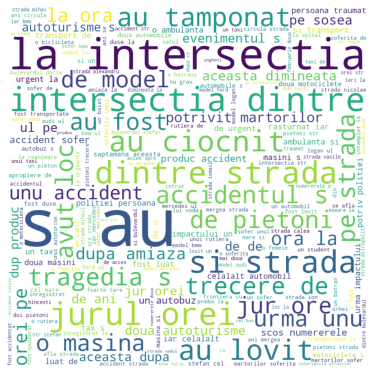

lenghts of the text_to_plot is 31331


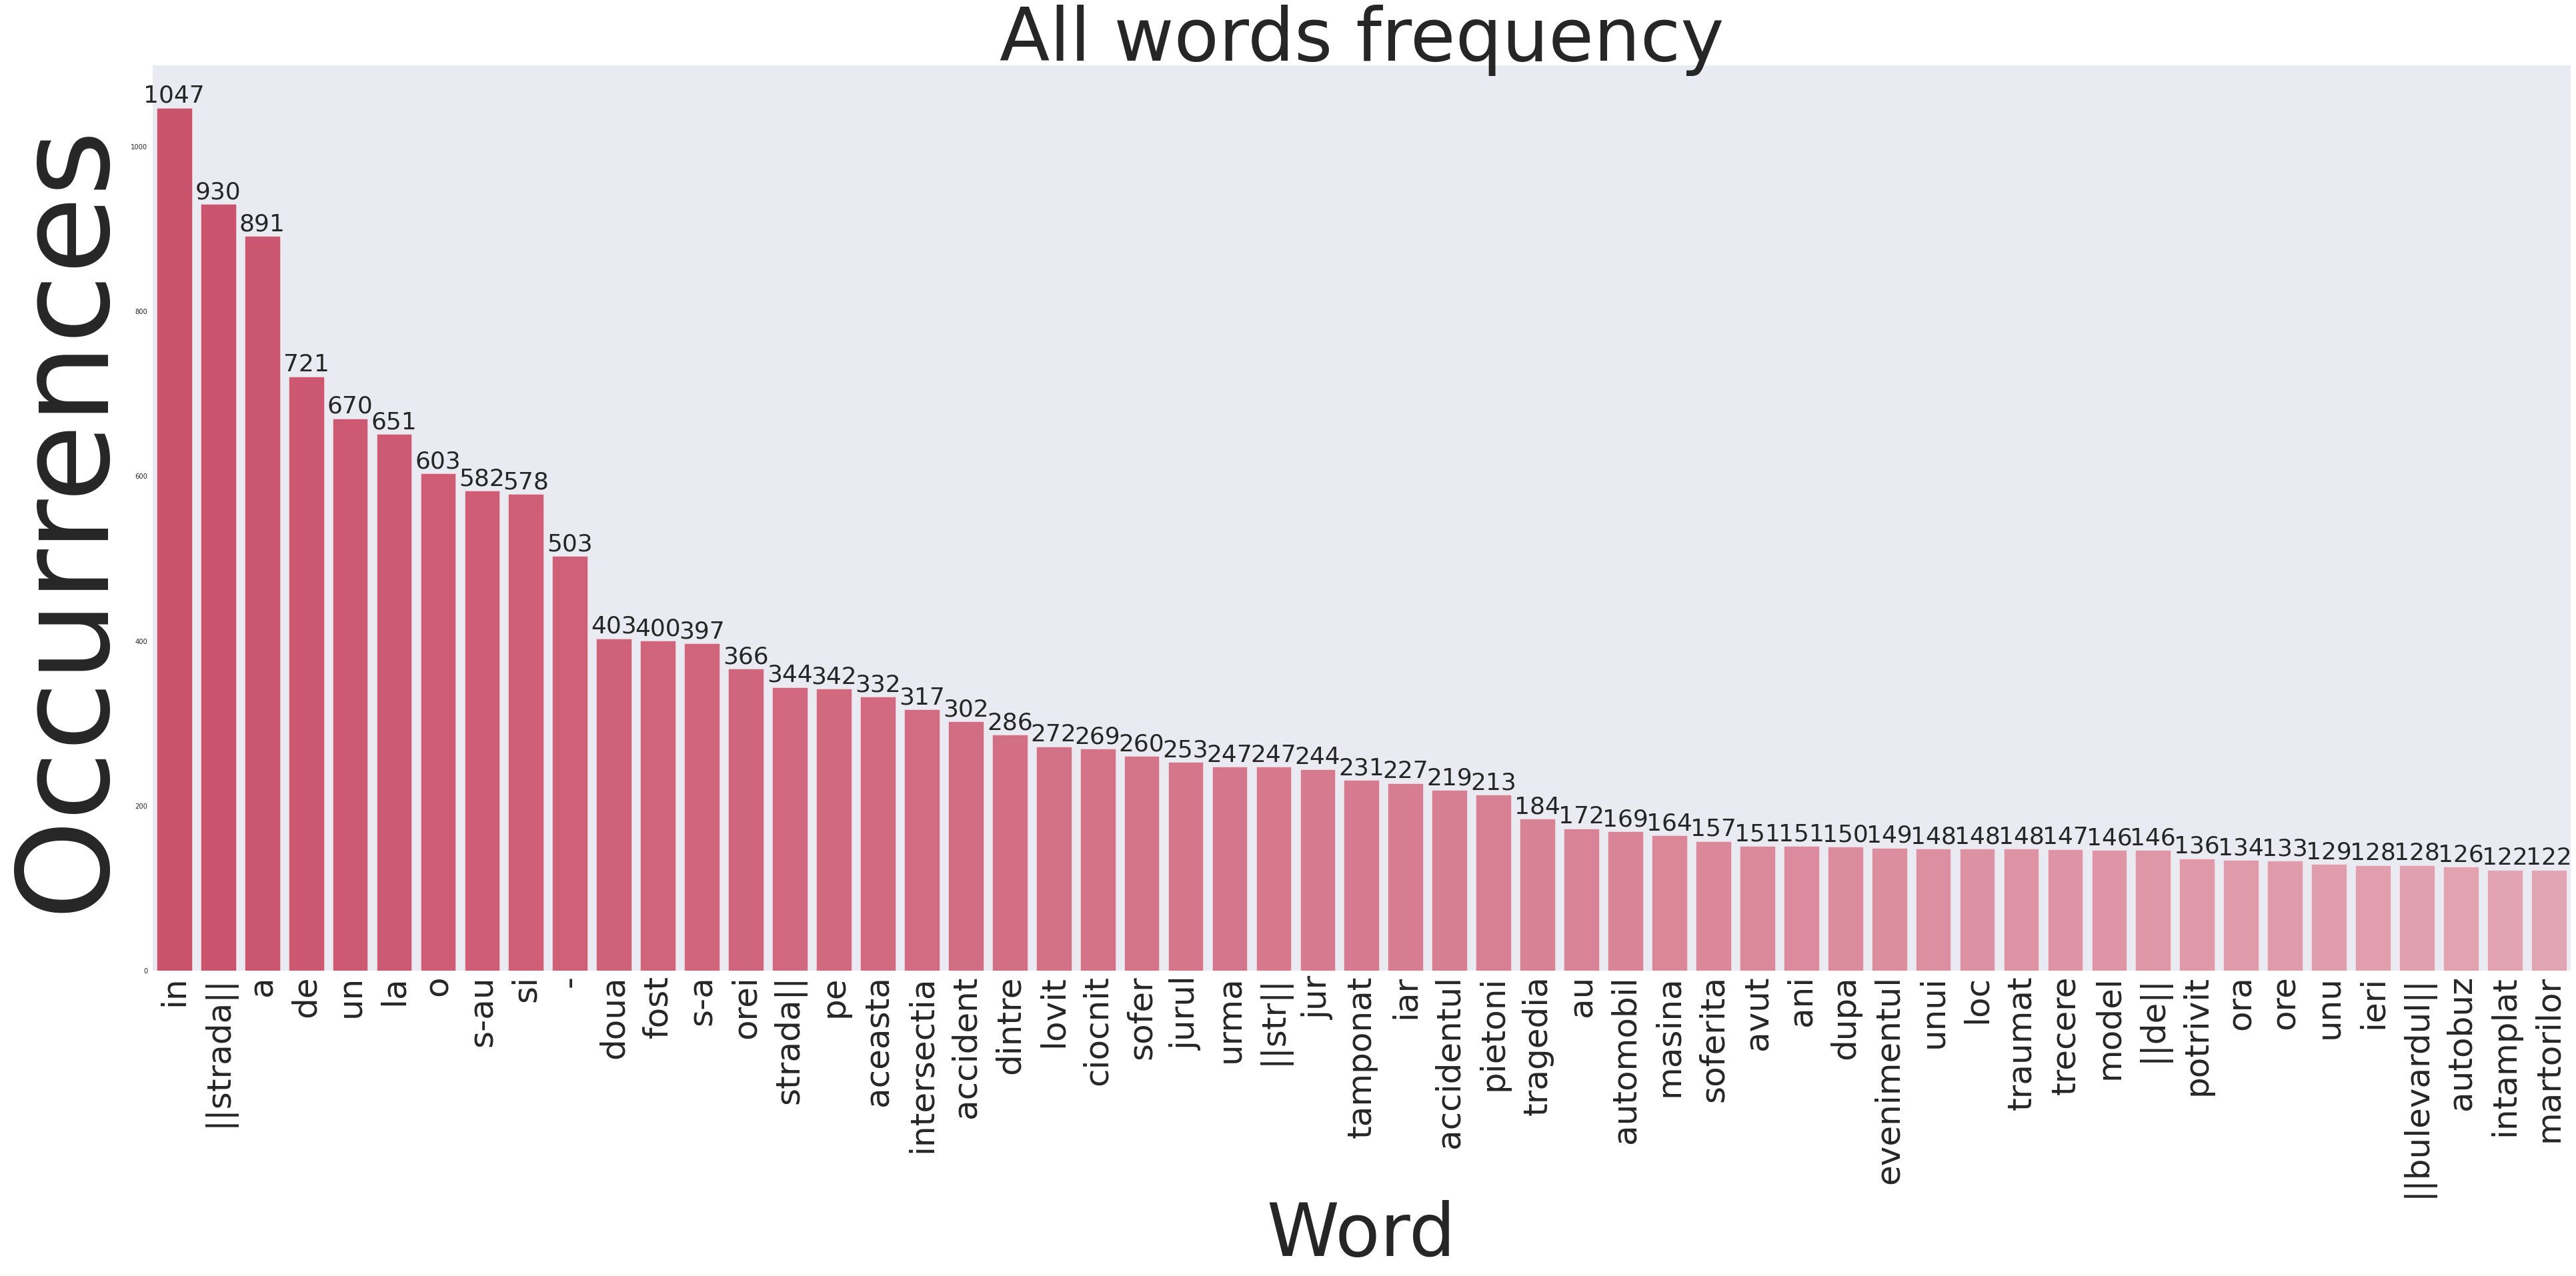

In [9]:
# Clean the dataframe column with the name text and visualize what are the main words that the model
# should take as the main features

all_corpus_text, dataframe_column_clean = clean_data(df['text'])

# Assign the column after it was cleaned of special characters
dataframe_column_clean = df['text_no_sw']

generate_cloud(df["text"])
plot_word_freq(all_corpus_text, title='All words frequency')

# Parse and analyse the whole text corpus

# Parse and analyse the marked words from the text-corpus

# Add columns to our df from the values extracted from them

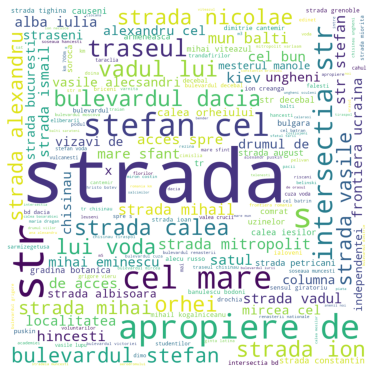

lenghts of the text_to_plot is 7676


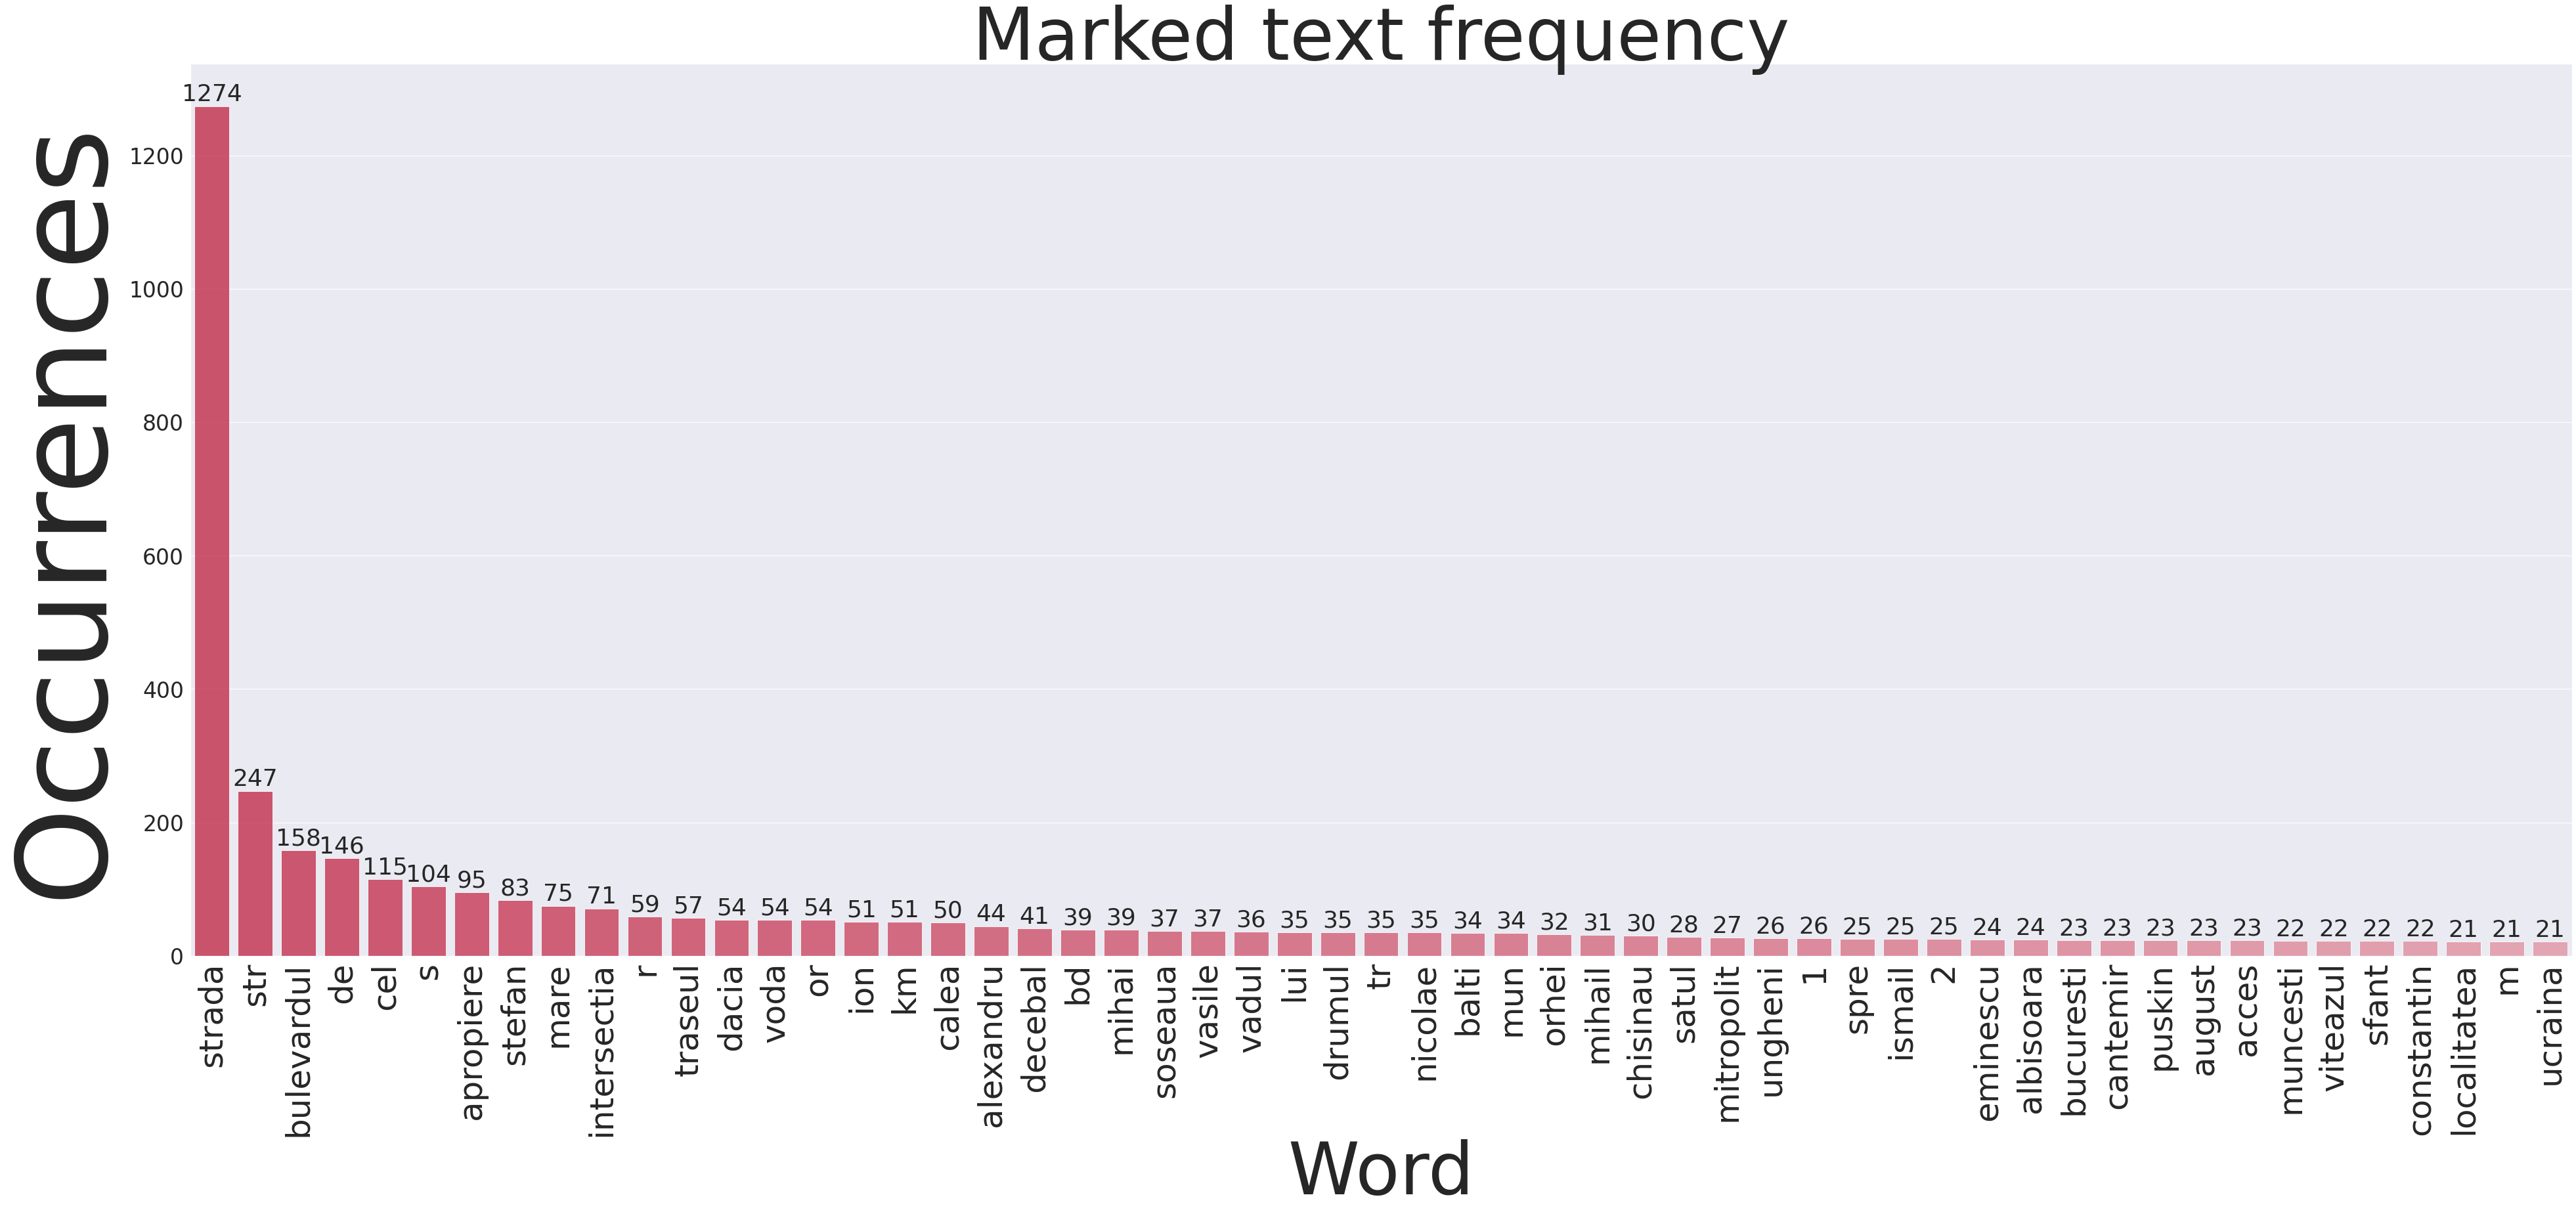

In [10]:
from nlp.pptext import split_in_ent_and_non_ent

# Splits the column in 2 lists (all_marked_text = holds all the enteties and all_unmarked_text = non-enteties)
all_marked_text, all_unmarked_text = split_in_ent_and_non_ent(df['text_no_sw'])

# Visualize text that has not been annotated
generate_cloud(all_marked_text)

plot_word_freq(all_marked_text, title='Marked text frequency')

dict_all_entities, dict_all_non_enteties, dict_num_all_entities, dict_num_all_non_entities \
    = get_how_many_entities_and_non_entities_per_phrase(df['text_no_sw'])


# Assign to the previously created column the dictionaries with the values
df['all_enteties'] = pd.Series(dict_all_entities)
df['all_non_enteties'] = pd.Series(dict_all_non_enteties)
df['num_all_enteties'] = pd.Series(dict_num_all_entities)
df['num_all_non_enteties'] = pd.Series(dict_num_all_non_entities)

# Parse and analyse the unmarked words from the text-corpus

14808


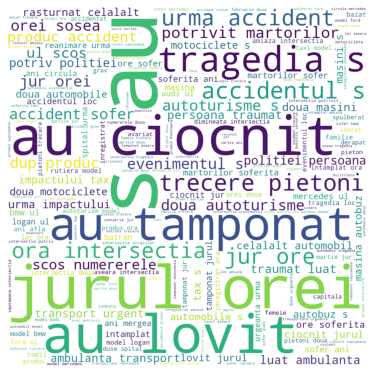

lenghts of the text_to_plot is 14808


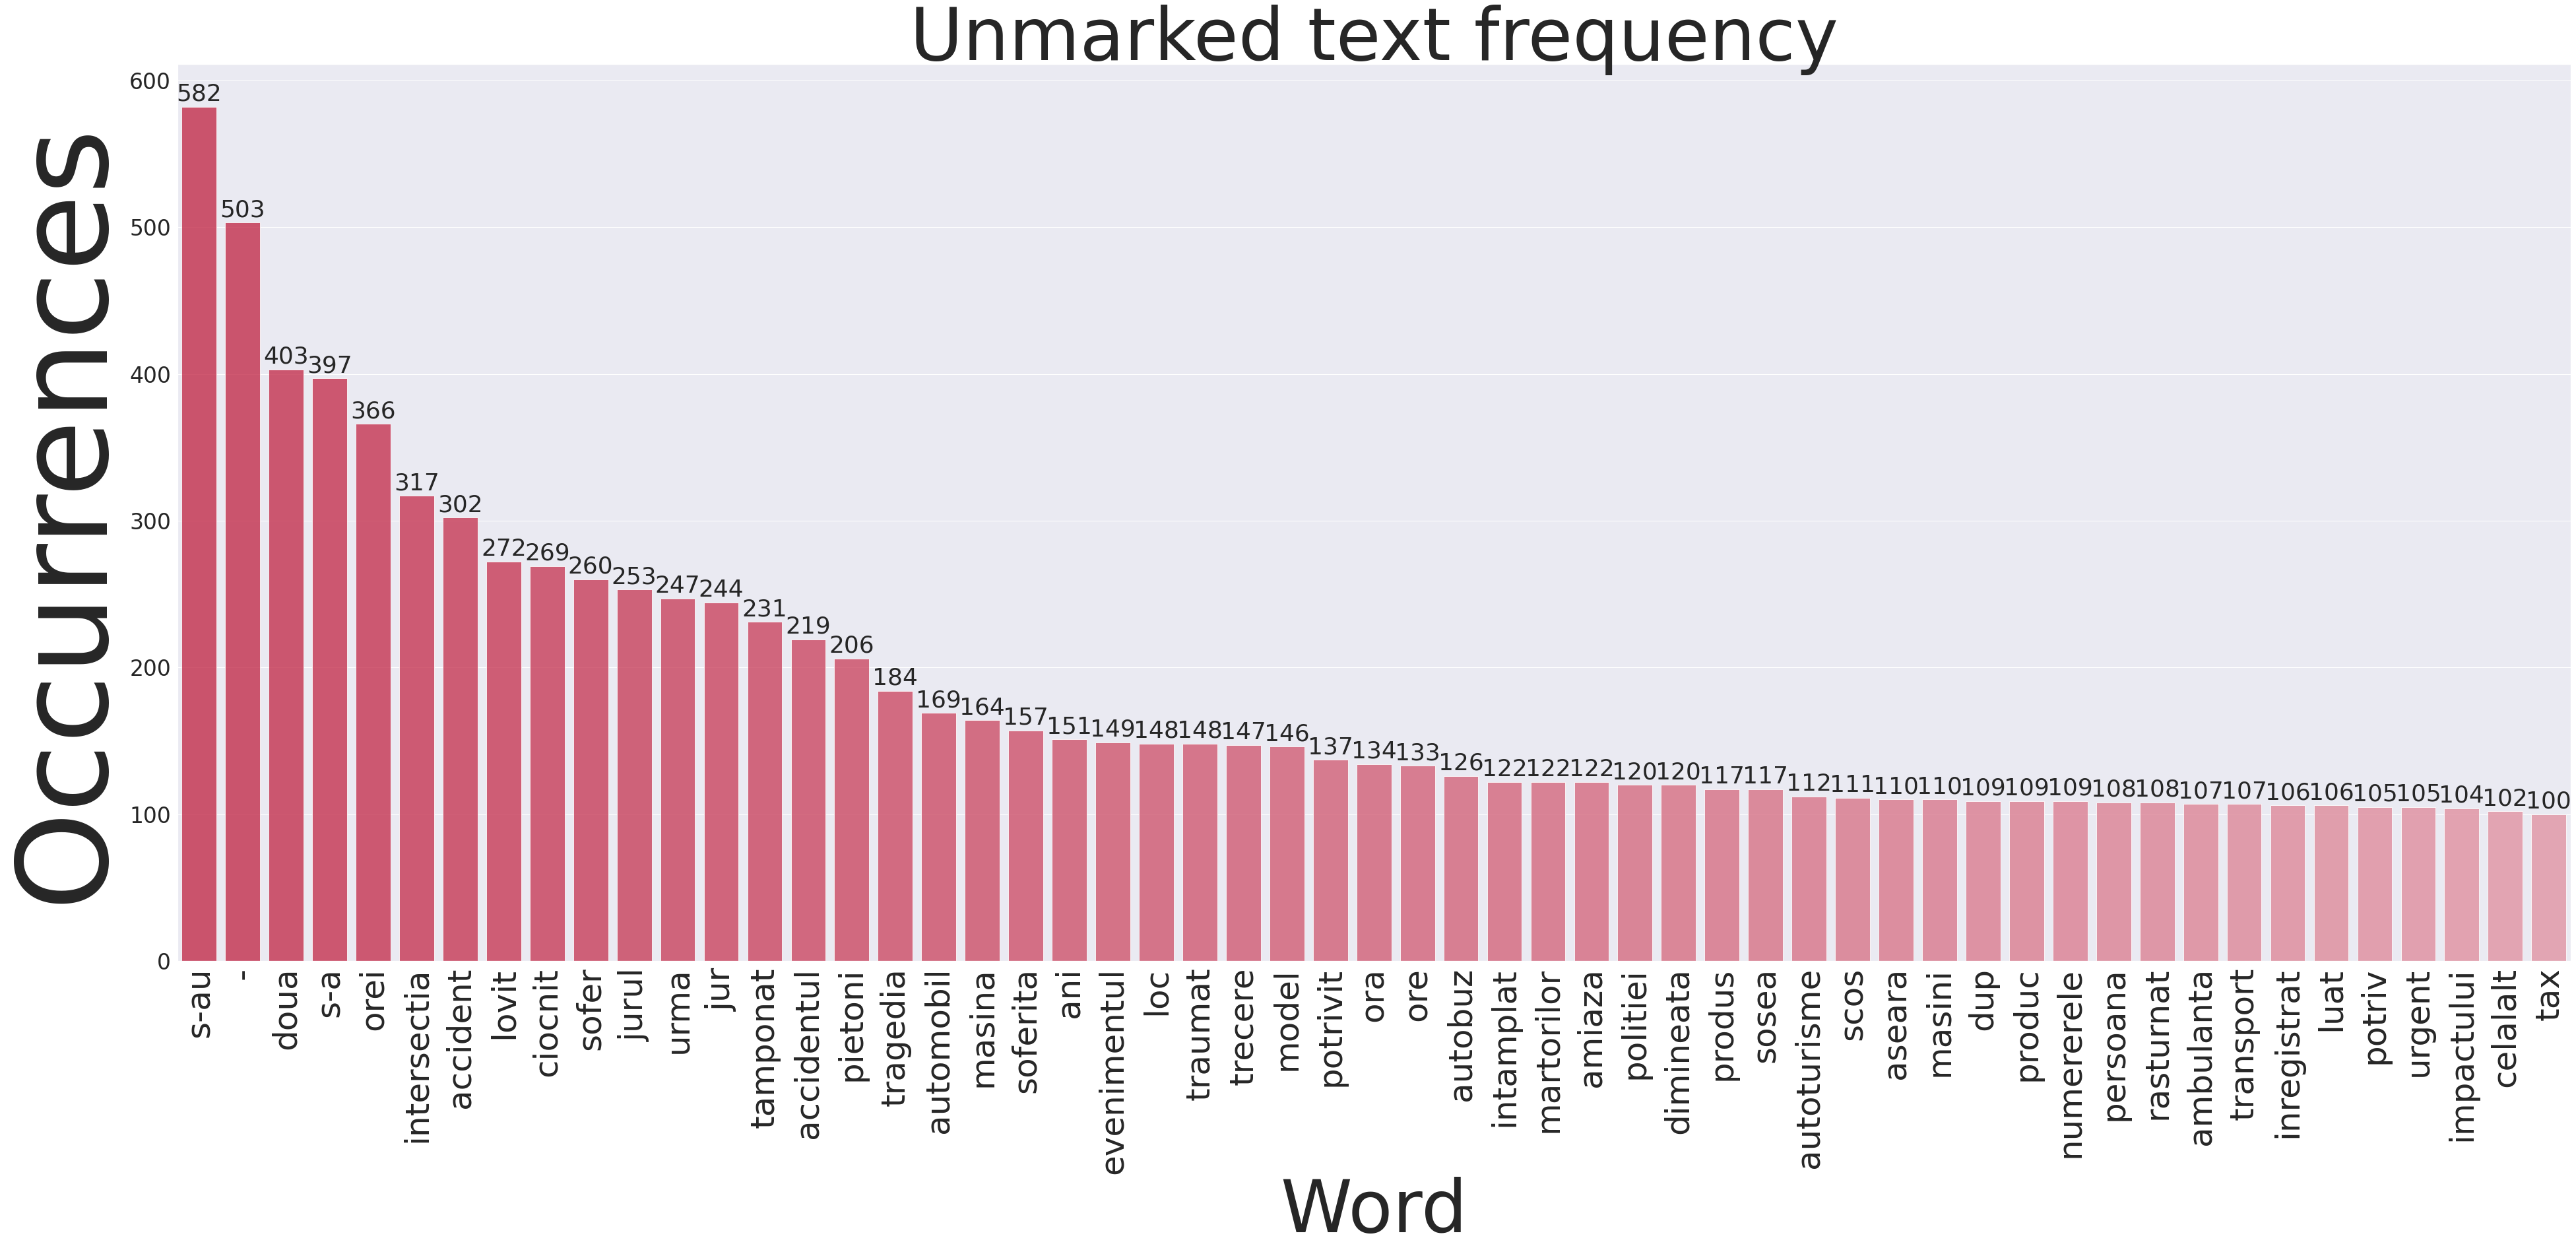

In [11]:
# Visualize text that has not been annotated
# print(all_unmarked_text)
print(len(all_unmarked_text))
generate_cloud(all_unmarked_text)
plot_word_freq(all_unmarked_text, title='Unmarked text frequency')

# Parse and analyse words from both marked and unmarked text-corspus

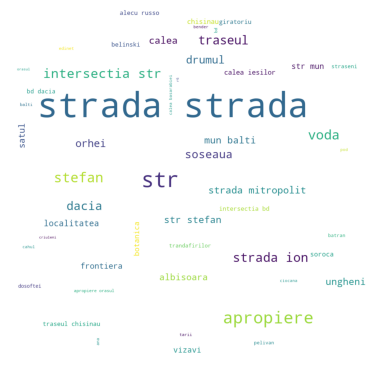

lenghts of the text_to_plot is 2985


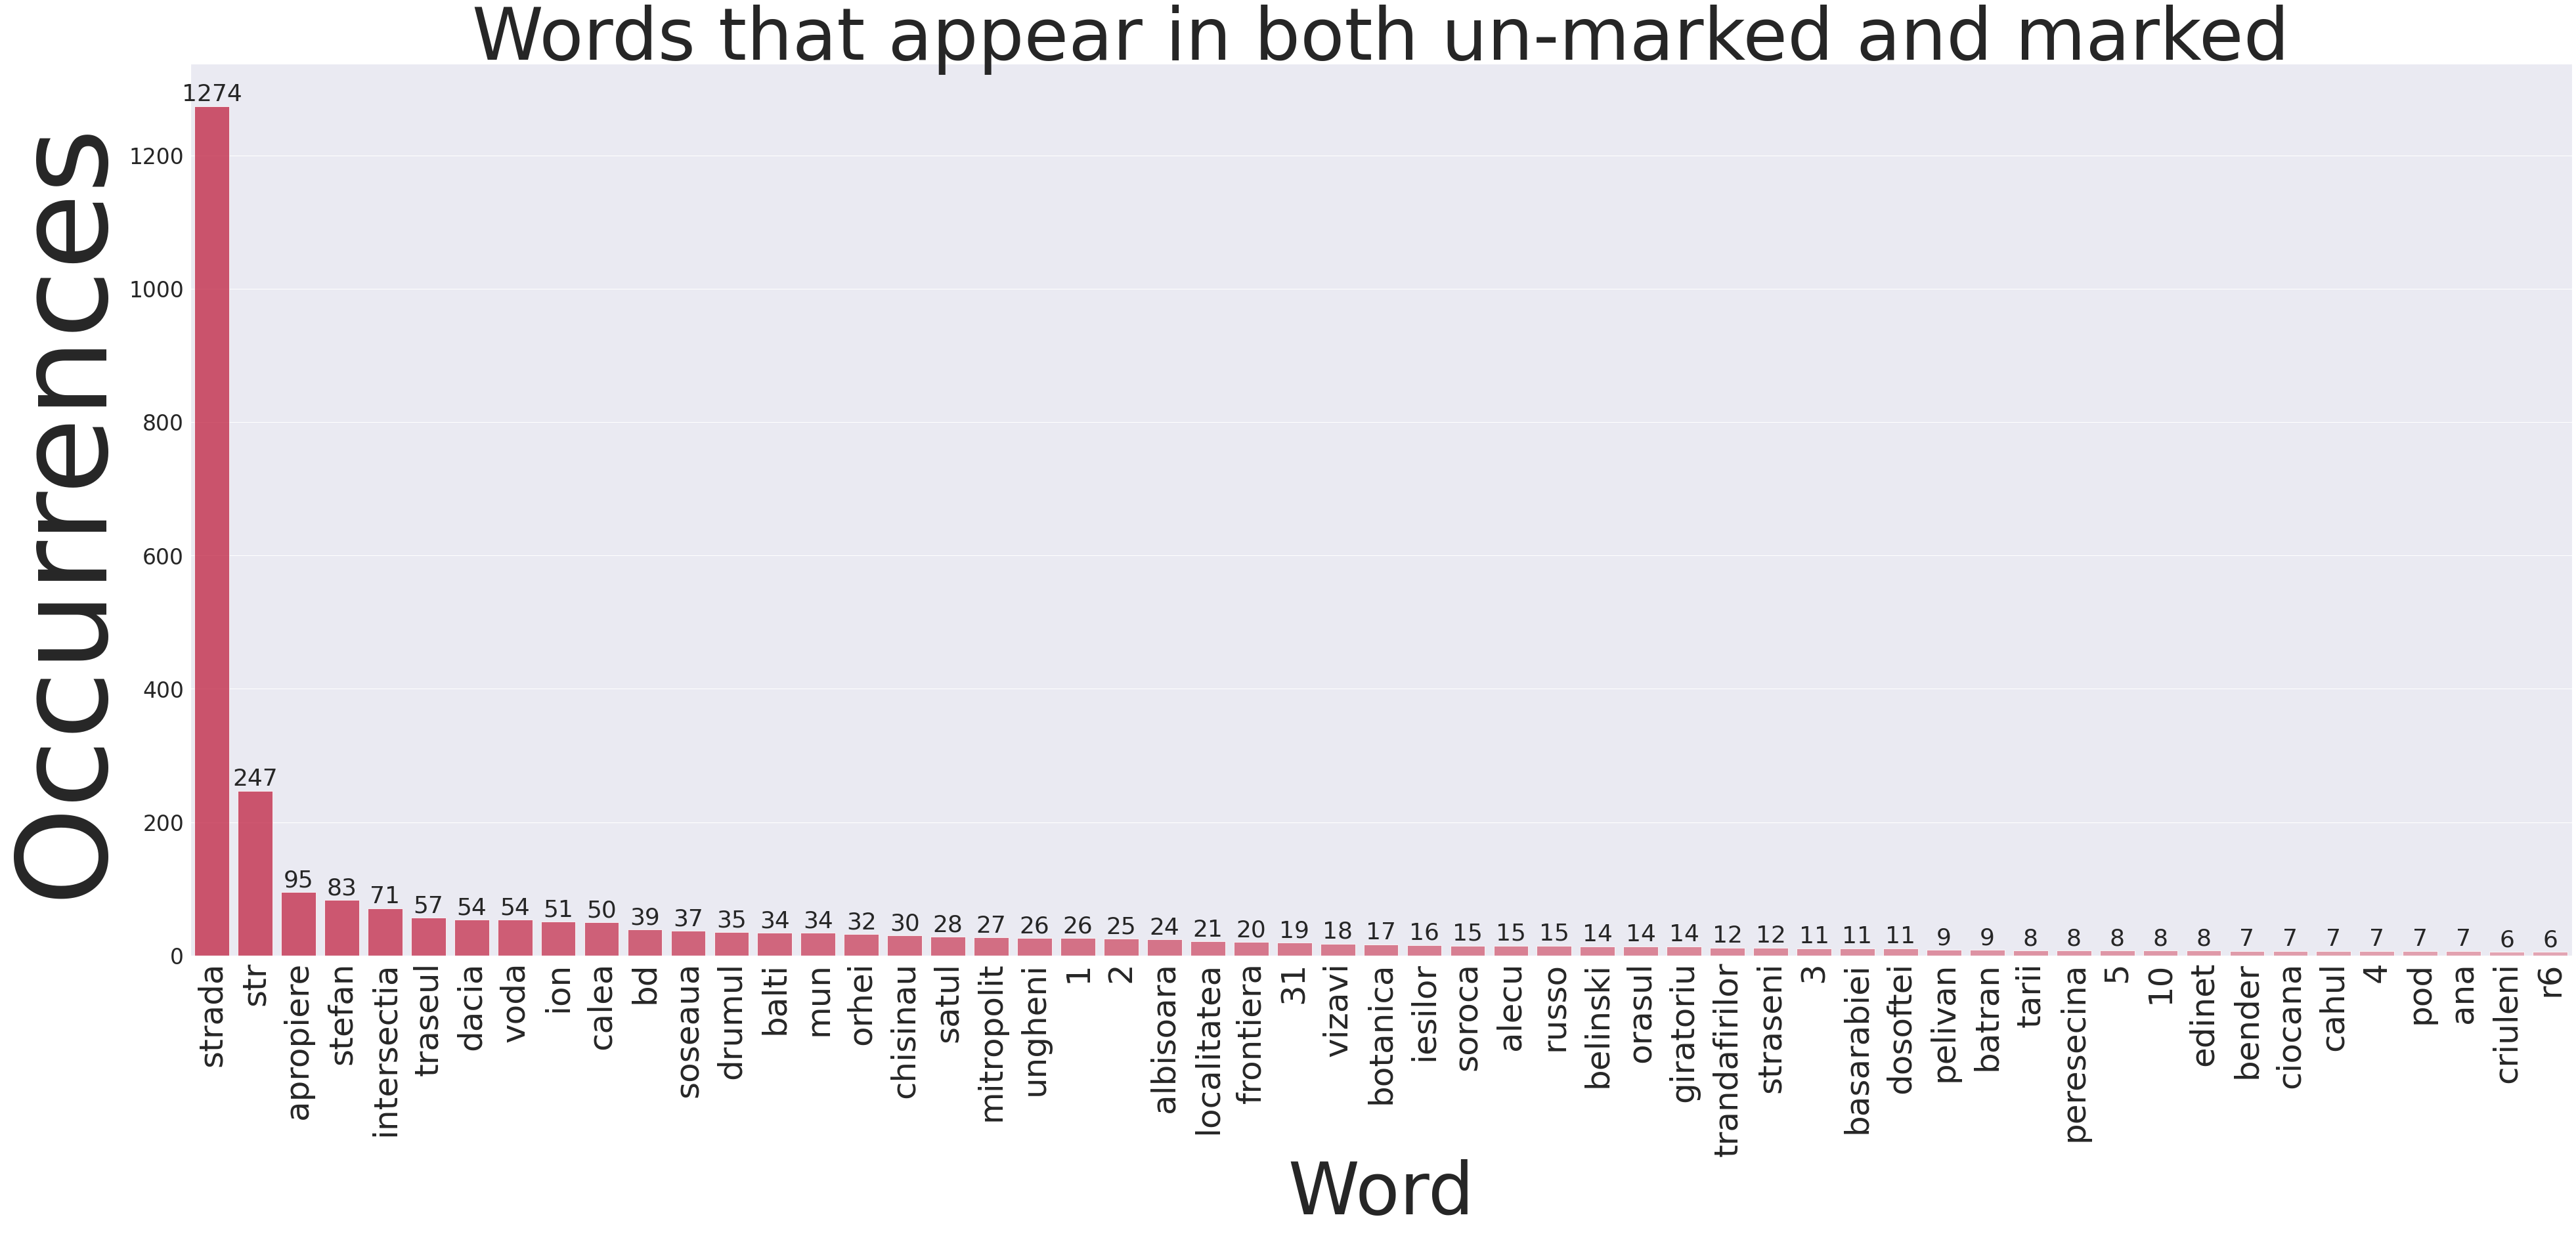

In [12]:
words_that_appear_in_both = get_words_appearing_in_both(all_unmarked_text,all_marked_text)
# print(words_that_appear_in_both)
generate_cloud(words_that_appear_in_both)
plot_word_freq(words_that_appear_in_both, title='Words that appear in both un-marked and marked')

In [13]:
# TIME TO DETECT ENTITIES AND CLEAN THE TEXT
import spacy

# install romanian models
# !python3 -m spacy download ro_core_news_lg

nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words


# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()

# remove all stop words that appear in the romanian text corpus || dont remove for training purpouses
# df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

df['text_no_sw'] = df['text']

In [14]:
df['text_no_sw_no_bars'] = df['text_no_sw'].str.replace('|','')

df['text_no_sw_no_bars'][0]

'un sofer a tamponat\xa0o femeie\xa0pe trecerea pietoni intersectia bd decebal cu strada trandafirilor\xa0potrivit politiei persoana traumata a fost luata o ambulanta si transportata urgenta spital'

## Iterate over all rows in "df['text_no_sw_no_bars']" and highlight the entities

In [15]:
# TEST THE BUILT-IN ROMANIAN NER MODEL FROM SPACY
nlp = spacy.load("ro_core_news_lg")
nlp.pipe_names

# doc = nlp("impactul a avut loc intersectia strazii 31 august cu strada ismail")
doc = nlp("in zona se circula cu dificulte pe strada bogdan voda direct spre strada aerodromului astfel serviciul ”infotrafic” recomanda conduc auto")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

strada bogdan voda 35 53 LOC
strada aerodromului 66 85 LOC


In [16]:
from nlp.pptext import split_and_save_to_new_column

holding_dict = split_and_save_to_new_column(df['text_no_sw'])
## Insert our data in spacy training format into the df column 'Training_format'
if 'Entities_position' in df.columns:
    df = df.drop(columns='Entities_position')


# Assign to the previously created column the dictionaries with the values
df['Entities_position'] = pd.Series(holding_dict)

df.head()

,id,y,text,com,text_no_sw,all_enteties,all_non_enteties,num_all_enteties,num_all_non_enteties,text_no_sw_no_bars,Entities_position
0,0,1,un sofer a tamponat o femeie pe trecerea pieto...,NaN,un sofer a tamponat o femeie pe trecerea pieto...,"[bd, decebal, strada, trandafirilor]","[sofer, tamponat, femeie, trecerea, pietoni, i...",4,15,un sofer a tamponat o femeie pe trecerea pieto...,"{'entities': [(61, 63, 'LOC_ACCIDENT'), (64, 7..."
1,1,1,aseara jurul orei 23:30 politia capitalei a fo...,NaN,aseara jurul orei 23:30 politia capitalei a fo...,"[traseul, spre, localitatea, cheltuitori]","[aseara, jurul, orei, 23:30, politia, capitale...",4,20,aseara jurul orei 23:30 politia capitalei a fo...,"{'entities': [(94, 101, 'LOC_ACCIDENT'), (110,..."
2,6,1,accidentul sa intamplat aceasta dimineata pe |...,NaN,accidentul sa intamplat aceasta dimineata pe |...,"[soseaua, muncesti]","[accidentul, intamplat, dimineata, capitala]",2,4,accidentul sa intamplat aceasta dimineata pe s...,"{'entities': [(45, 52, 'LOC_ACCIDENT'), (53, 6..."
3,7,1,un pieton a fost spulberat mortal aseara un ta...,NaN,un pieton a fost spulberat mortal aseara un ta...,"[soseaua, muncesti]","[pieton, spulberat, mortal, aseara, taxi, acci...",2,11,un pieton a fost spulberat mortal aseara un ta...,"{'entities': [(73, 80, 'LOC_ACCIDENT'), (81, 8..."
4,10,1,accidentul a avut loc sectorul botanica pe ||s...,NaN,accidentul a avut loc sectorul botanica pe ||s...,"[strada, trandafirilor]","[accidentul, loc, sectorul, botanica, jurul, o...",2,7,accidentul a avut loc sectorul botanica pe str...,"{'entities': [(43, 49, 'LOC_ACCIDENT'), (50, 6..."


In [17]:
row1_text = df['text_no_sw_no_bars'][0]
print(type(row1_text))
print(row1_text)

enteties_text = df['all_enteties'][1]
Entities_position_text = df['Entities_position'][1]

print(type(enteties_text))
print(enteties_text)
print(type(Entities_position_text))
print((Entities_position_text))
df

<class 'str'>
un sofer a tamponat o femeie pe trecerea pietoni intersectia bd decebal cu strada trandafirilor potrivit politiei persoana traumata a fost luata o ambulanta si transportata urgenta spital
<class 'list'>
['traseul', 'spre', 'localitatea', 'cheltuitori']
<class 'dict'>
{'entities': [(94, 101, 'LOC_ACCIDENT'), (110, 114, 'LOC_ACCIDENT'), (115, 126, 'LOC_ACCIDENT'), (127, 138, 'LOC_ACCIDENT')]}


,id,y,text,com,text_no_sw,all_enteties,all_non_enteties,num_all_enteties,num_all_non_enteties,text_no_sw_no_bars,Entities_position
0,0,1,un sofer a tamponat o femeie pe trecerea pieto...,NaN,un sofer a tamponat o femeie pe trecerea pieto...,"[bd, decebal, strada, trandafirilor]","[sofer, tamponat, femeie, trecerea, pietoni, i...",4,15,un sofer a tamponat o femeie pe trecerea pieto...,"{'entities': [(61, 63, 'LOC_ACCIDENT'), (64, 7..."
1,1,1,aseara jurul orei 23:30 politia capitalei a fo...,NaN,aseara jurul orei 23:30 politia capitalei a fo...,"[traseul, spre, localitatea, cheltuitori]","[aseara, jurul, orei, 23:30, politia, capitale...",4,20,aseara jurul orei 23:30 politia capitalei a fo...,"{'entities': [(94, 101, 'LOC_ACCIDENT'), (110,..."
2,6,1,accidentul sa intamplat aceasta dimineata pe |...,NaN,accidentul sa intamplat aceasta dimineata pe |...,"[soseaua, muncesti]","[accidentul, intamplat, dimineata, capitala]",2,4,accidentul sa intamplat aceasta dimineata pe s...,"{'entities': [(45, 52, 'LOC_ACCIDENT'), (53, 6..."
3,7,1,un pieton a fost spulberat mortal aseara un ta...,NaN,un pieton a fost spulberat mortal aseara un ta...,"[soseaua, muncesti]","[pieton, spulberat, mortal, aseara, taxi, acci...",2,11,un pieton a fost spulberat mortal aseara un ta...,"{'entities': [(73, 80, 'LOC_ACCIDENT'), (81, 8..."
4,10,1,accidentul a avut loc sectorul botanica pe ||s...,NaN,accidentul a avut loc sectorul botanica pe ||s...,"[strada, trandafirilor]","[accidentul, loc, sectorul, botanica, jurul, o...",2,7,accidentul a avut loc sectorul botanica pe str...,"{'entities': [(43, 49, 'LOC_ACCIDENT'), (50, 6..."
...,...,...,...,...,...,...,...,...,...,...,...
1649,378,1,duminica 20 martie doua autoturisme s-au cioc...,NaN,duminica 20 martie doua autoturisme s-au cioc...,"[s, cimislia, r, cimislia]","[duminica, 20, martie, doua, autoturisme, s-au...",4,7,duminica 20 martie doua autoturisme s-au cioc...,"{'entities': [(55, 56, 'LOC_ACCIDENT'), (57, 6..."
1650,378,1,doi pietoni au fost transportate la urgeanta ...,NaN,doi pietoni au fost transportate la urgeanta ...,"[strada, petricani, apropiere, de, sensul, gir...","[pietoni, transportate, urgeanta, urma, accident]",9,5,doi pietoni au fost transportate la urgeanta ...,"{'entities': [(67, 73, 'LOC_ACCIDENT'), (74, 8..."
1651,378,1,sambata 30 mai o masina si un autobuz s-au ci...,NaN,sambata 30 mai o masina si un autobuz s-au ci...,"[str, tiraspol, 5]","[sambata, 30, masina, autobuz, s-au, ciocnit, ...",3,7,sambata 30 mai o masina si un autobuz s-au ci...,"{'entities': [(70, 73, 'LOC_ACCIDENT'), (74, 8..."
1652,378,1,sambata 22 ianuarie doua autoturisme s-au cio...,NaN,sambata 22 ianuarie doua autoturisme s-au cio...,"[or, durlesti, strada, stefan, voda]","[sambata, 22, ianuarie, doua, autoturisme, s-a...",5,7,sambata 22 ianuarie doua autoturisme s-au cio...,"{'entities': [(55, 57, 'LOC_ACCIDENT'), (58, 6..."


In [18]:
# Save the current DF into a CSV to later use for analysis
df.to_csv('../data/processed/ner - locatia accidente_clean.csv', index=False)

## Deviding the Training-Set from the testing set

# join half of the real phrases with half of the generated ones for both training and testing
records_train = df[['text_no_sw_no_bars','Entities_position']].iloc[np.r_[0:80, 160:900]].to_records(index=False)
records_test = df[['text_no_sw_no_bars','Entities_position']].iloc[np.r_[80:156, 900:1450]].to_records(index=False)

records_test_real = df[['text_no_sw_no_bars','Entities_position']][80:156].to_records(index=False)
records_test_generated = df[['text_no_sw_no_bars','Entities_position']][900:1450].to_records(index=False)


result_train = list(records_train)
result_test = list(records_test)

result_test_real = list(records_test_real)
result_test_generated = list(records_test_generated)

In [19]:
training_data = result_train
print("We have",len(training_data)," training samples")

testing_data = result_test
print("We have",len(testing_data)," testing samples")

testing_data_real = result_test_real
print("We have",len(testing_data_real),"  real testing samples")

testing_data_generated = result_test_generated
print("We have",len(testing_data)," generated testing samples")

We have 820  training samples
We have 626  testing samples
We have 76   real testing samples
We have 626  generated testing samples


In [20]:
from train.train import main
        
# Train the model using the already existing: model='ro_core_news_lg'
#                          using the dataset:TRAIN_DATA= training_data
#                   train for 100 iterations: n_iter=100
#                     then save the model to:output_dir='../src/models/'
main(model='ro_core_news_lg',TRAIN_DATA= training_data, output_dir='../src/models/', n_iter=100)

Started Training
Losses {'ner': 13493.730809032917}
Losses {'ner': 11992.653710827231}
Losses {'ner': 11681.87470833771}
Losses {'ner': 11677.174611318856}
Losses {'ner': 11604.858611807227}
Losses {'ner': 11520.33190278709}
Losses {'ner': 11505.449720531702}
Losses {'ner': 11450.89587174356}
Losses {'ner': 11456.879352092743}
Losses {'ner': 11386.868445158005}
Losses {'ner': 11395.007634967566}
Losses {'ner': 11369.817496024072}
Losses {'ner': 11428.854130286723}
Losses {'ner': 11390.094815909863}
Losses {'ner': 11313.281859874725}
Losses {'ner': 11377.269614115357}
Losses {'ner': 11262.52354092151}
Losses {'ner': 11196.713186647743}
Losses {'ner': 11388.571866810322}
Losses {'ner': 11229.687173337385}
Losses {'ner': 11261.489991635084}
Losses {'ner': 11279.615912541747}
Losses {'ner': 11230.288066512898}
Losses {'ner': 11172.769685268402}
Losses {'ner': 11216.686225447804}
Losses {'ner': 11211.700887620449}
Losses {'ner': 11233.993105381727}
Losses {'ner': 11139.958381354809}
Losses 

In [25]:
nlp = spacy.load('../src/models/')


def remove_whitespace_entities(doc):
    doc.ents = [e for e in doc.ents if not e.text.isspace()]
    return doc

nlp.add_pipe(remove_whitespace_entities, after='ner')

# doc = nlp("Totul s-a întâmplat în data de 27 octombrie pe o stradă din municipiul hincesti")
# doc = nlp("O şoferiţă din Chişinău a intrat dur cu al său Mercedes într-o staţie de aşteptare a transportului public Accidentul cu pricina a avut loc în această după amiază în apropriere de intersecţia străzilor Meșterul Manole și Vadul lui Vodă din sectorul Ciocana")
# doc = nlp('De unde şi când a apărut acolo? În această după amiază, pe strada Nicolae Dimo din capitală, camera de bord dintr-un SUV a surprins momentul în care automobilul premergător intră brusc într-un obstacol. Apariţia în trafic s-a dovedit a fi un alt autovehicul care se afla pe contrasens!')


list_ent_results = []
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
    tuple_ent =(ent.start_char, ent.end_char, ent.label_) 
    list_ent_results.append(tuple_ent)

strada bogdan voda 35 53 LOC
strada aerodromului 66 85 LOC


In [26]:
from nlp.evaluate import check_accuracy

## Get accuracy by testing the whole testing_set(real + generated)
dict_with_phrases, dict_false_positive, dict_false_negative =  check_accuracy(testing_data, model=nlp, test_set_name='All')

## Get accuracy by testing the whole real_testing_set(real only)
dict_with_phrases, dict_false_positive, dict_false_negative =  check_accuracy(testing_data_real, model=nlp, test_set_name='Real_data')

## Get accuracy by testing the whole generated_testing_set(generated only)
dict_with_phrases, dict_false_positive, dict_false_negative = check_accuracy(testing_data_generated, model=nlp, test_set_name='Generated_data')


##Create dict that holds all the wrong predictions made by the model
df2 = pd.DataFrame()
df2['PHRASE_WRONG'] = pd.Series(dict_with_phrases)
df2['Location_false_positive'] = pd.Series(dict_false_positive)
df2['Location_false_negative'] = pd.Series(dict_false_negative)

559 "<= correct | All | wrong =>", 67
Guessed: 559 from 626 which is 89.29712460063898%
--------------------------------------------------
22 "<= correct | Real_data | wrong =>", 54
Guessed: 22 from 76 which is 28.947368421052634%
--------------------------------------------------
537 "<= correct | Generated_data | wrong =>", 13
Guessed: 537 from 550 which is 97.63636363636363%
--------------------------------------------------


## GET THE WORDS THAT ARE IN COLUMN: 'false_positive'

In [ ]:
# df2['NEW'] = df2['Location_false_negative'].apply(lambda x: [x[0][0],x[0][1]] if len(x)>=1 elif len(x)>=1 else print('NONE'))


In [27]:
# EXTRACT POSITIONS ONLY || [(112, 120, LOC_ACCIDENT)] --> [112, 120] || FROM THE LISTS
from nlp.evaluate import extract_pos

if 'false_positive_poss' in df2.columns:
    df2 = df2.drop(columns='false_positive_poss')
if 'false_negative_poss' in df2.columns:
    df2 = df2.drop(columns='false_negative_poss')

df2['false_positive_poss'] = df2['Location_false_positive'].apply(extract_pos)
df2['false_negative_poss'] = df2['Location_false_negative'].apply(extract_pos)

df2

,PHRASE_WRONG,Location_false_positive,Location_false_negative,false_positive_poss,false_negative_poss
0,luni 27 mai in jur ore 12:30 s baroncea noua ...,[],"[(32, 40, LOC_ACCIDENT), (30, 31, LOC_ACCIDENT...",[],"[[32, 40], [30, 31], [41, 45]]"
1,luni 20 decembrie o masina si un autobuz s-au...,[],"[(97, 99, LOC_ACCIDENT)]",[],"[[97, 99]]"
2,luni 9 aprilie in jur ore 20:20 gradiste sofe...,[],"[(33, 41, LOC_ACCIDENT)]",[],"[[33, 41]]"
3,joi 7 martie in jur ore 22: edinet in apropie...,[],"[(29, 35, LOC_ACCIDENT)]",[],"[[29, 35]]"
4,marti 23 decembrie in jur ore 13:30 strada ca...,[],"[(61, 68, LOC_ACCIDENT)]",[],"[[61, 68]]"
5,o familie au fost duse la urgeanta in urma un...,[],"[(79, 86, LOC_ACCIDENT)]",[],"[[79, 86]]"
6,vineri 25 decembrie in jur ore 19:20 strada m...,[],"[(53, 56, LOC_ACCIDENT)]",[],"[[53, 56]]"
7,doua automobile s-au tamponat aseara tr chisi...,"[(66, 72, LOC_ACCIDENT), (73, 76, LOC_ACCIDENT...","[(73, 77, LOC_ACCIDENT), (65, 72, LOC_ACCIDENT)]","[[66, 72], [73, 76], [65, 66], [76, 77]]","[[73, 77], [65, 72]]"
8,tragedia s-a inregistrat aseara in apropiere ...,"[(61, 71, LOC_ACCIDENT)]","[(61, 78, LOC_ACCIDENT)]","[[61, 71]]","[[61, 78]]"
9,doua masini s-au tamponat in jurul orei 14:00...,"[(69, 76, LOC_ACCIDENT), (81, 89, LOC_ACCIDENT)]",[],"[[69, 76], [81, 89]]",[]


## GET THE WORDS THAT ARE IN COLUMN: 'false_positive'

In [28]:
from nlp.evaluate import extract_word


if 'false_positive_words' in df2.columns:
    df2 = df2.drop(columns='false_positive_words')
if 'false_negative_words' in df2.columns:
    df2 = df2.drop(columns='false_negative_words')

# axis = 0: by column = column-wise = along the rows
# axis = 1: by row = row-wise = along the columns
df2["false_positive_words"] = df2[["PHRASE_WRONG", "false_positive_poss"]].apply(extract_word, axis=1)
df2["false_negative_words"] = df2[["PHRASE_WRONG", "false_negative_poss"]].apply(extract_word, axis=1)

if 'false_positive_words_string' in df2.columns:
    df2 = df2.drop(columns='false_positive_words_string')
if 'false_negative_words_string' in df2.columns:
    df2 = df2.drop(columns='false_negative_words_string')

df2['false_positive_words_string'] = df2['false_positive_words'].apply(lambda x: ' '.join(x))
df2['false_negative_words_string'] = df2['false_negative_words'].apply(lambda x: ' '.join(x))

# pd.set_option('display.max_rows', 100) 
df2

,PHRASE_WRONG,Location_false_positive,Location_false_negative,false_positive_poss,false_negative_poss,false_positive_words,false_negative_words,false_positive_words_string,false_negative_words_string
0,luni 27 mai in jur ore 12:30 s baroncea noua ...,[],"[(32, 40, LOC_ACCIDENT), (30, 31, LOC_ACCIDENT...",[],"[[32, 40], [30, 31], [41, 45]]",[],"[baroncea, s, noua]",,baroncea s noua
1,luni 20 decembrie o masina si un autobuz s-au...,[],"[(97, 99, LOC_ACCIDENT)]",[],"[[97, 99]]",[],[51],,51
2,luni 9 aprilie in jur ore 20:20 gradiste sofe...,[],"[(33, 41, LOC_ACCIDENT)]",[],"[[33, 41]]",[],[gradiste],,gradiste
3,joi 7 martie in jur ore 22: edinet in apropie...,[],"[(29, 35, LOC_ACCIDENT)]",[],"[[29, 35]]",[],[edinet],,edinet
4,marti 23 decembrie in jur ore 13:30 strada ca...,[],"[(61, 68, LOC_ACCIDENT)]",[],"[[61, 68]]",[],[intrare],,intrare
5,o familie au fost duse la urgeanta in urma un...,[],"[(79, 86, LOC_ACCIDENT)]",[],"[[79, 86]]",[],[parcare],,parcare
6,vineri 25 decembrie in jur ore 19:20 strada m...,[],"[(53, 56, LOC_ACCIDENT)]",[],"[[53, 56]]",[],[3/6],,3/6
7,doua automobile s-au tamponat aseara tr chisi...,"[(66, 72, LOC_ACCIDENT), (73, 76, LOC_ACCIDENT...","[(73, 77, LOC_ACCIDENT), (65, 72, LOC_ACCIDENT)]","[[66, 72], [73, 76], [65, 66], [76, 77]]","[[73, 77], [65, 72]]","[anenii, noi, (, )]","[noi), (anenii]",anenii noi ( ),noi) (anenii
8,tragedia s-a inregistrat aseara in apropiere ...,"[(61, 71, LOC_ACCIDENT)]","[(61, 78, LOC_ACCIDENT)]","[[61, 71]]","[[61, 78]]",[stolniceni],"[stolniceni,edinet]",stolniceni,"stolniceni,edinet"
9,doua masini s-au tamponat in jurul orei 14:00...,"[(69, 76, LOC_ACCIDENT), (81, 89, LOC_ACCIDENT)]",[],"[[69, 76], [81, 89]]",[],"[iesirea, aerogara]",[],iesirea aerogara,


In [29]:
detect_entities_in_dataframe(dataframe_column = df2['PHRASE_WRONG'],model_path = '../src/models/')

[(r, 'LOC_ACCIDENT'), (drochia, 'LOC_ACCIDENT')]


[(str, 'LOC_ACCIDENT'), (biruintei, 'LOC_ACCIDENT'), ((, 'LOC_ACCIDENT'), (победа, 'LOC_ACCIDENT'), (), 'LOC_ACCIDENT')]


[]


/usr/local/lib/python3.8/dist-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


[(apropiere, 'LOC_ACCIDENT'), (de, 'LOC_ACCIDENT'), (localitatea, 'LOC_ACCIDENT'), (alexandreni, 'LOC_ACCIDENT')]


[(strada, 'LOC_ACCIDENT'), (calea, 'LOC_ACCIDENT'), (iesilor, 'LOC_ACCIDENT'), (gara, 'LOC_ACCIDENT'), (de, 'LOC_ACCIDENT'), (nord, 'LOC_ACCIDENT')]


[(strada, 'LOC_ACCIDENT'), (petru, 'LOC_ACCIDENT'), (zadnipru, 'LOC_ACCIDENT')]


[(strada, 'LOC_ACCIDENT'), (miorita, 'LOC_ACCIDENT')]


[(tr, 'LOC_ACCIDENT'), (chisinau-tiraspol, 'LOC_ACCIDENT'), (km, 'LOC_ACCIDENT'), (41, 'LOC_ACCIDENT'), ((, 'LOC_ACCIDENT'), (anenii, 'LOC_ACCIDENT'), (noi, 'LOC_ACCIDENT'), (), 'LOC_ACCIDENT')]


[(apropiere, 'LOC_ACCIDENT'), (de, 'LOC_ACCIDENT'), (localitatea, 'LOC_ACCIDENT'), (stolniceni, 'LOC_ACCIDENT')]


[(bulevardul, 'LOC_ACCIDENT'), (dacia, 'LOC_ACCIDENT'), (80/3, 'LOC_ACCIDENT'), (iesirea, 'LOC_ACCIDENT'), (aerogara, 'LOC_ACCIDENT')]


[(strada, 'LOC_ACCIDENT'), (uzinelor, 'LOC_ACCIDENT'), (vizavi, 'LOC_ACCIDENT'), (de, 'LOC_ACCIDENT'), (sala, 'LOC_ACCIDENT'), (de, 'LOC_ACCIDENT'), (nunti, 'LOC_ACCIDENT'), (magician, 'LOC_ACCIDENT')]


[(soseaua, 'LOC_ACCIDENT'), (muncesti, 'LOC_ACCIDENT'), (apropiere, 'LOC_ACCIDENT'), (de, 'LOC_ACCIDENT'), (magazinul, 'LOC_ACCIDENT'), (de, 'LOC_ACCIDENT'), (piese, 'LOC_ACCIDENT'), (auto, 'LOC_ACCIDENT'), (arca, 'LOC_ACCIDENT'), (moldovei, 'LOC_ACCIDENT')]


[(bulevardul, 'LOC_ACCIDENT'), (stefan, 'LOC_ACCIDENT'), (cel, 'LOC_ACCIDENT'), (mare, 'LOC_ACCIDENT'), (sfint, 'LOC_ACCIDENT'), (strada, 'LOC_ACCIDENT'), (mitropolit, 'LOC_ACCIDENT'), (g, 'LOC_ACCIDENT'), (banulescu-bodoni, 'LOC_ACCIDENT')]


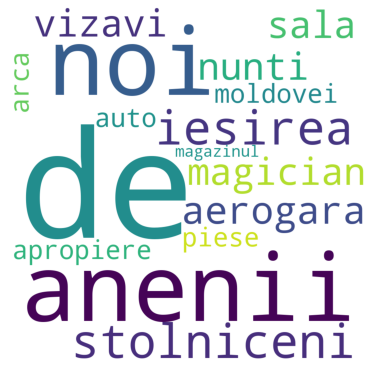

In [30]:
all_false_positive_words = []
for phrases in df2["false_positive_words_string"]:
    if len(phrases) < 1:
        pass
    else:
        all_false_positive_words.append(phrases)
    
generate_cloud(df2["false_positive_words_string"])

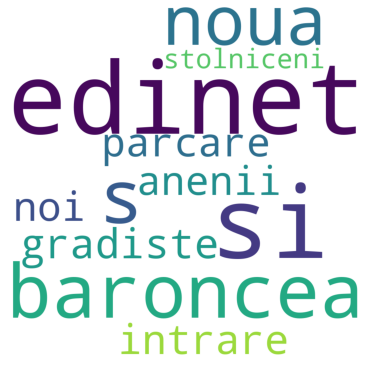

In [31]:
all_false_positive_words = []
for phrases in df2["false_negative_words_string"]:
    if len(phrases) < 1:
        pass
    else:
        all_false_positive_words.append(phrases)
    
generate_cloud(df2["false_negative_words_string"])

## Analysis of the model metrics
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png "Title")

UAS (Unlabelled Attachment Score) and LAS (Labelled Attachment Score) are standard metrics to evaluate dependency parsing. UAS is the proportion of tokens whose head has been correctly assigned, LAS is the proportion of tokens whose head has been correctly assigned with the right dependency label (subject, object, etc).

ents_p = precision ||
ents_r = recall ||
ents_f = fscore ||
for the NER task
tags_acc is the POS tagging accuracy.
token_acc is precision for token segmentation.

In [ ]:
# • recall
# • presicion
# • confusion matrix
# • example paterns in false positives
# • example paterns in false negatives

from nlp.evaluate import evaluate



all_examples = testing_data
real_examples = testing_data_real
generated_examples = testing_data_generated

results = evaluate(nlp, all_examples)
print(f"--------------------------\nFor all_examples\nprecision is: {results['ents_p']}\nrecall is: {results['ents_r']}\nfscore is: {results['ents_f']}")

results = evaluate(nlp, real_examples)
print(f"-------------------------\nFor real_examples\nprecision is: {results['ents_p']}\nrecall is: {results['ents_r']}\nfscore is: {results['ents_f']}")

results = evaluate(nlp, generated_examples)
print(f"-------------------------\nFor generated_examples\nprecision is: {results['ents_p']}\nrecall is: {results['ents_r']}\nfscore is: {results['ents_f']}")


--------------------------
For all_examples
precision is: 95.28332787422208
recall is: 99.01293396868618
fscore is: 97.11233516942079
-------------------------
For real_examples
precision is: 68.21705426356588
recall is: 94.6236559139785
fscore is: 79.2792792792793
